# Image Recognition with Inception V3

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

檔案路徑

In [2]:
imPath = 'images/dog.jpg'
pbPath = 'models/inception_v3/classify_image_graph_def.pb'

#### 載入影像

利用 tf.gfile.FastGFile 來讀取影像，讀取出來的資料型態為 byte

In [3]:
image  = tf.gfile.FastGFile(imPath, 'rb').read()

#### 載入 Graph

In [4]:
with tf.gfile.FastGFile(pbPath, 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name = '')

#### 執行影像辨識

1.這裡的輸入層與輸出層的名稱可在 tensorboard 中得知<br>
2.np.argsort(x)會按照 x 中數值小->大輸出 index，(-x) 則是大->小

In [5]:
with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')          # 提出輸出層
    predict = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image}) # 輸入影像並獲取輸出層結果
    
    # 根據類別機率大小排序，這裡取前5名
    top = np.argsort(-predict[0])[0:4]
    for index in top:
        score = predict[0][index]
        print('Class ID: {}，Score: {}'.format(index, score))

Class ID: 118，Score: 0.9499596357345581
Class ID: 148，Score: 0.002054527634754777
Class ID: 589，Score: 0.0019745794124901295
Class ID: 560，Score: 0.0013232958735898137


在這裡因為下載 Inception v3 所附帶的類別資訊檔比較複雜，所以沒有特別處理，不過可以先從 imagenet_2012_challenge_label_map_proto.pbtxt 中找到對應的 target_class (如這裡的 top1 是 118)，其中會有一組 target_class_string ，再去 imagenet_synset_to_human_label_map.txt 的第一欄找出對應的代號，第二欄就是該目標的類別名稱。如下圖所示：
<br><br>
![](images/07/top1_class.PNG)

真的判斷出是博美...太厲害了...

#### 顯示影像
上面提到用 tf.gfile 讀入的檔案資料型態會是 byte ，所以要先 decoder 才會得到圖片數值資訊。

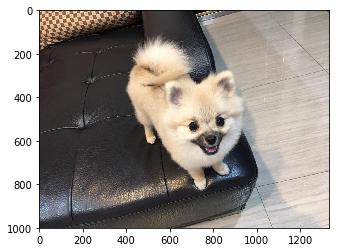

In [13]:
image_raw_data = tf.image.decode_jpeg(image)
plt.imshow(image_raw_data.eval(session = tf.Session()))
plt.show()